## import des bibliothèques utiles 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### import et ouverture du dataset

In [28]:
df = pd.read_csv('total.csv', index_col=0)
df.head(10)

,date,titre,budget,recette,duree,genres,synopsis,tagline,realisateur,casting,compagnies_production,suite,production_countries,langues,imdb_id,vote_average,vote_count,status
0,2014-11-12,Dumb and Dumber To,40000000,169837010,110,['Comedy'],"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,"['Bobby Farrelly', 'Peter Farrelly']","['Jim Carrey', 'Jeff Daniels', 'Laurie Holden'...","['New Line Cinema', 'Universal Pictures', 'Con...",3,['US'],['en'],tt2096672,5.542,2740,Released
1,2004-11-11,Марс,2000000,240000,100,"['Comedy', 'Drama']","Somewhere deep, deep in Russia there is a town...",NaN,['Anna Melikyan'],"['Nana Kiknadze', 'Artur Smolyaninov', 'Yevgen...","['Central Partnership', 'Studio SLON']",1,['RU'],['ru'],tt0417949,5.700,3,Released
2,2014-01-22,"I, Frankenstein",65000000,76801179,92,"['Horror', 'Thriller']","200 years after his shocking creation, Dr. Fra...","In the battle between good and evil, an immort...",[],"['Aaron Eckhart', 'Yvonne Strahovski', 'Bill N...","['Lakeshore Entertainment', 'Sidney Kimmel Ent...",1,"['AU', 'US']",['en'],tt1418377,5.272,1628,Released
3,2014-03-20,Captain America: The Winter Soldier,170000000,714766572,136,"['Action', 'Adventure', 'Science Fiction']",After the cataclysmic events in New York with ...,In heroes we trust.,"['Anthony Russo', 'Joe Russo']","['Chris Evans', 'Scarlett Johansson', 'Sebasti...",['Marvel Studios'],2,['US'],['en'],tt1843866,7.678,16638,Released
4,2013-09-11,Vikingdom,15600000,747872,114,['Adventure'],A warrior fleeing the violence of his past mus...,Live by the Sword.,[],"['Dominic Purcell', 'Natassia Malthe', 'Craig ...",['KRU Studios'],1,['MY'],"['en', 'zh']",tt1785669,4.380,54,Released
5,2012-03-15,Тот ещё Карлосон!,4000000,9938268,80,"['Comedy', 'Fantasy', 'Family']","The hero of Mikhail Galustyan, known in our wo...",NaN,['Sarik Andreasyan'],"['Mikhail Galustyan', 'Igor Vernik', 'Mariya S...",['Enjoy Movies'],1,['RU'],['ru'],tt2288121,3.400,24,Released
6,1976-04-05,The Blue Bird,12000000,887000,95,"['Adventure', 'Family', 'Fantasy', 'Drama']","A pair of peasant children, Mytyl and her brot...",NaN,['George Cukor'],"['Elizabeth Taylor', 'Jane Fonda', 'Ava Gardne...","['20th Century Fox', 'Lenfilm', 'Sovinfilm', '...",1,"['RU', 'US']",['en'],tt0074225,6.000,25,Released
7,1986-06-13,Mona Lisa,0,5794184,105,"['Crime', 'Drama', 'Romance']",George is a small-time crook just out of priso...,Sometimes love is a strange and wicked game.,['Neil Jordan'],"['Bob Hoskins', 'Cathy Tyson', 'Michael Caine'...","['HandMade Films', 'Palace Productions']",1,['GB'],['en'],tt0091538,6.855,173,Released
8,1997-04-03,The Saint,68000000,118063304,116,"['Thriller', 'Action', 'Romance', 'Science Fic...","Simon Templar (The Saint), is a thief for hire...",Never reveal your name. Never turn your back. ...,['Phillip Noyce'],"['Val Kilmer', 'Elisabeth Shue', 'Rade Šerbedž...","['Paramount', 'Mace Neufeld Productions', 'Rys...",1,['US'],"['en', 'ru']",tt0120053,6.100,940,Released
9,2006-05-23,Desperation,12000000,0,131,"['Drama', 'Fantasy', 'Horror', 'Thriller', 'My...","When a sheriff arrests a writer, a family, a c...","In this town, there are no accidents.",[],"['Steven Weber', 'Tom Skerritt', 'Charles Durn...","['Buena Vista Pictures', 'Touchstone Televisio...",1,['US'],['en'],tt0129871,5.565,162,Released


### fonction permettant de transformer les données en string dans le DataFrame en tableau de string pour faciliter leurs manipulations

In [26]:
list_keys = ['genres', 'production_countries', 'realisateur', 'casting', 'compagnies_production', 'langues']

def str_to_list(df, key):
    df_new = df

    for k in key: #on parcourt les clés à modifier spécifiées en argument de la fonction

        for ind in range(df_new.shape[0]): #on parcourt toutes les lignes du Dataframe

            string = df_new[k].iloc[ind] #on récupère la valeur à modifier pour chaque ligne

            if type(string) == str : # on vérifie si c'est bien une string
                
                #création de la nouvelle variable de type liste qui remplacera l'ancienne

                liste_finale = []

                #remplissage de la variable de type liste en faisant des opérations sur la string

                list_string = string[1:-1].split(',')
                for i,j in enumerate(list_string):
                    if i == 0:
                        mot = j[1:-1]
                        if mot not in liste_finale:
                            liste_finale.append(mot)
                    else:
                        mot = j[2:-1]
                        if mot not in liste_finale:
                            liste_finale.append(mot)
                
                #affectation de la nouvelle valeur de type liste à l'élément modifié du Dataframe

                df_new.at[ind,k] = liste_finale

    return df_new


### Application de la fonction précédente pour créer un nouveau dataset

In [29]:
dataset = str_to_list(df, ['genres','production_countries', 'realisateur', 'casting', 'compagnies_production', 'langues'])

### Fonction permettant de compter le nombre de film par genre en renvoyant un dicitonnaire

In [33]:
def nb_film_genre(df):
    dico_genre = {}
    for i in range(df.shape[0]):
        list_genre = df.iloc[i].genres
        for genre in list_genre:
            if genre in list(dico_genre.keys()):
                dico_genre[genre] += 1
            else:
                dico_genre[genre] = 1
    return dico_genre

### Fonction pert

### Fonction permettant d'afficher un dictionnaire sous forme de bar chart

In [34]:
def dict_to_bar(dict):
    labels = list(dict.keys())
    x = list(dict.values())
    plt.figure(figsize=(20,20))
    plt.bar(labels, x)
    plt.show()

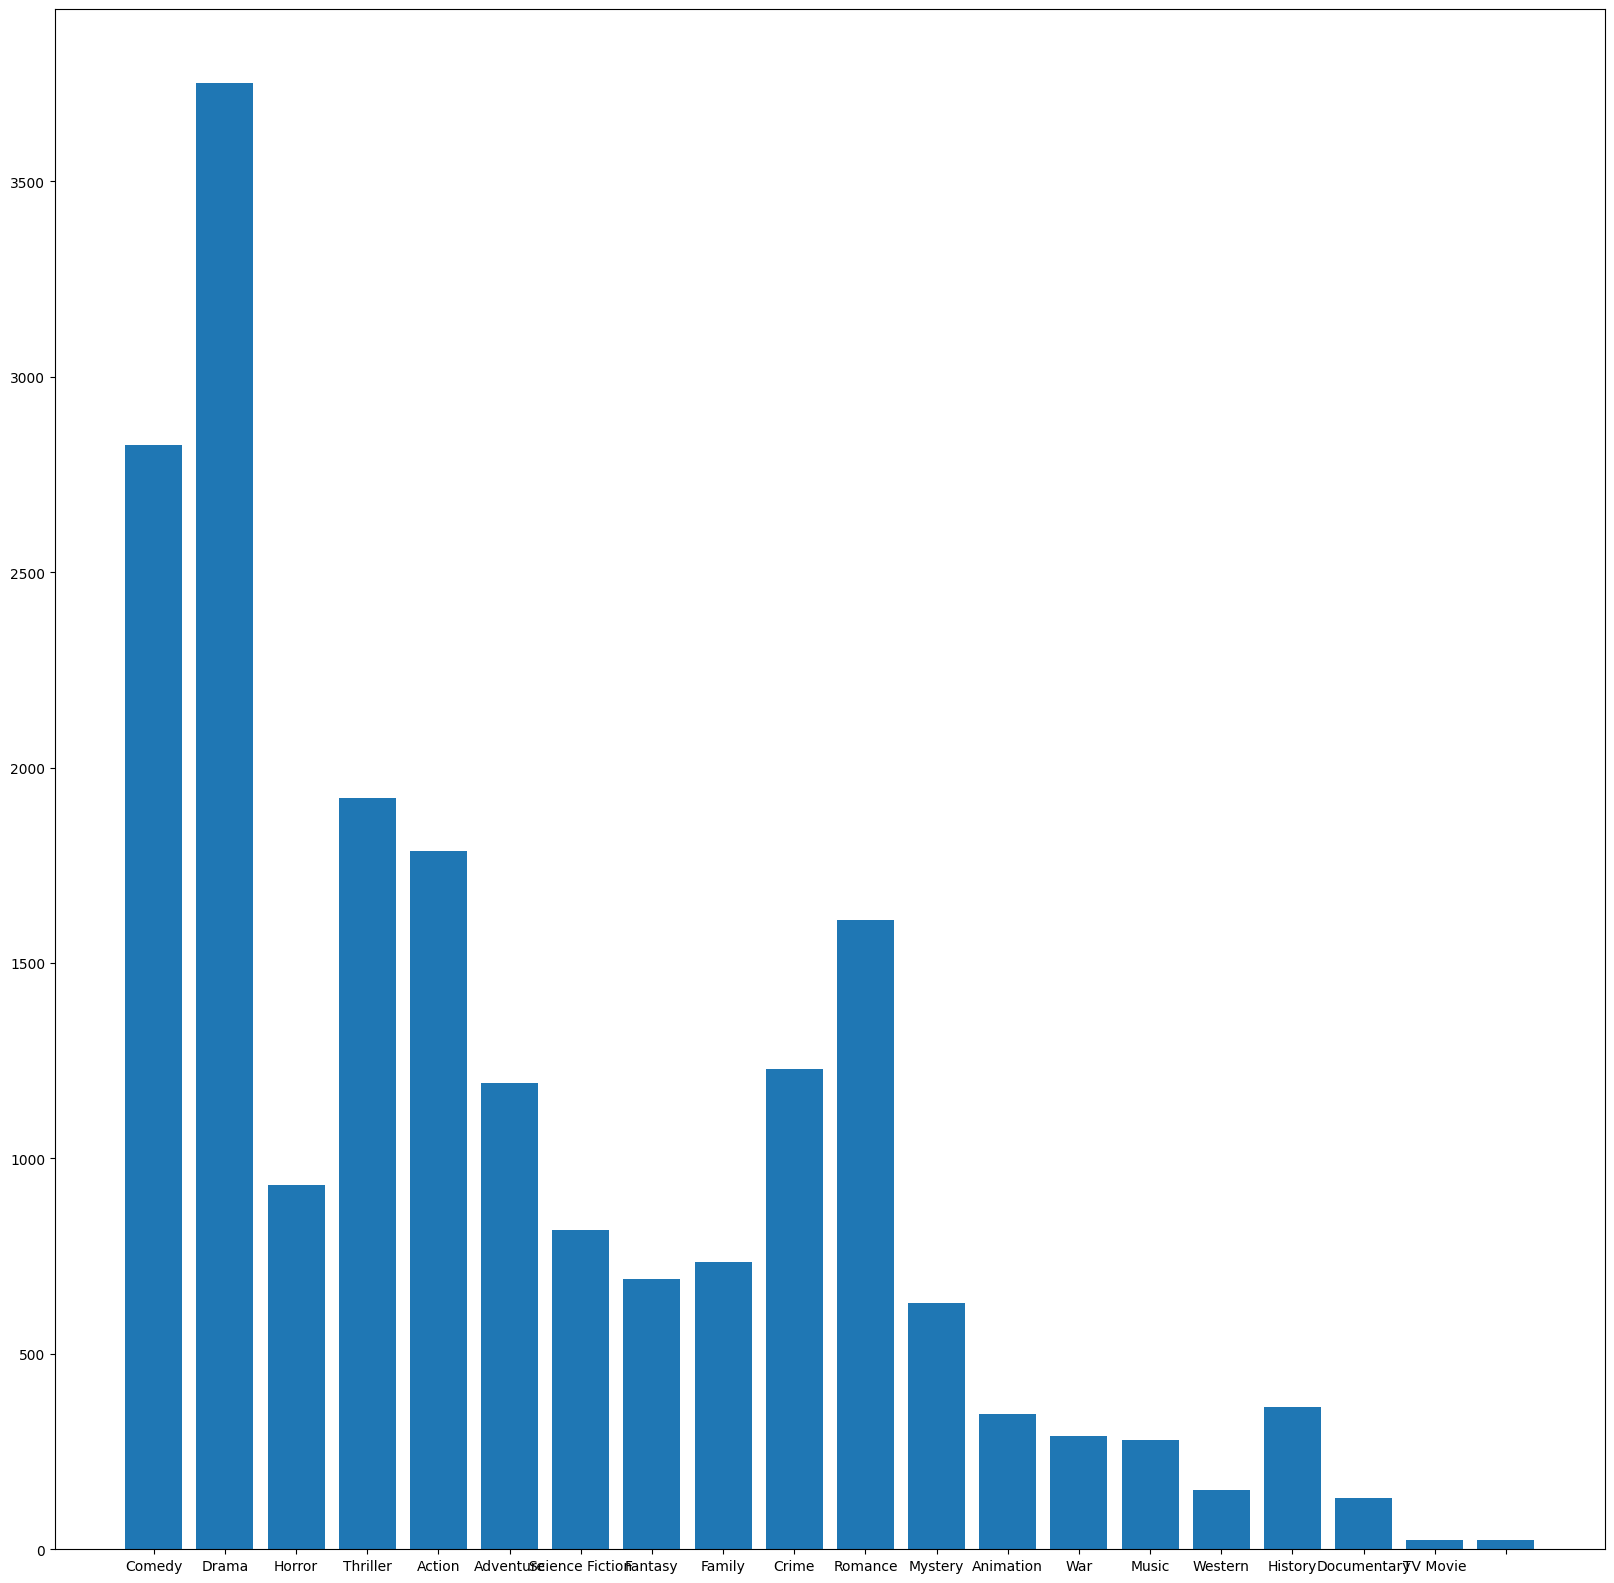

In [35]:
dico_genre = nb_film_genre(dataset)
dict_to_bar(dico_genre)